## 1. CNN challenge - Face to Age

### Objectives
-  Visualize images
-  Preprocess images for Neural Networks
-  Fit a custom CNN for a regression task
-  Fine-tune an analyse model performance

### 1.1 Visualize images

**👉 Load the dataset (200 Mo)**

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/images/images.csv')
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data

,age,pixels
0,45,200 168 96 107 123 132 132 135 135 134 134 137...
1,1,223 226 231 234 236 238 238 240 240 240 240 23...
2,35,23 29 24 29 47 71 110 141 166 169 169 174 179 ...
3,28,9 6 11 12 30 65 82 37 47 16 27 26 32 74 141 16...
4,24,67 66 63 59 61 62 60 66 83 103 139 173 192 194...
...,...,...
23700,35,48 47 52 66 78 89 96 104 117 127 139 142 149 1...
23701,55,101 107 110 114 118 120 127 129 132 137 139 14...
23702,28,161 134 113 114 98 93 92 90 82 58 23 45 85 105...
23703,3,65 82 84 129 141 116 43 46 54 71 58 60 64 66 7...


Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

**❓ Plot the histogram of age in your dataset.**

In [4]:
import matplotlib.pyplot as plt

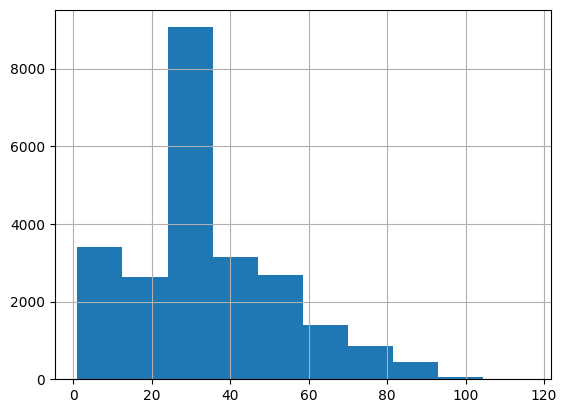

In [5]:
data.age.hist()
plt.show()

**❓ Visually display one image of your choice.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  int64 
 1   pixels  23705 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.5+ KB


In [7]:
import numpy as np

In [8]:
def get_img(string):
    image = np.fromstring(string, sep = " ").reshape(48,48,1)
    return image

In [9]:
image = get_img(data.pixels[0])

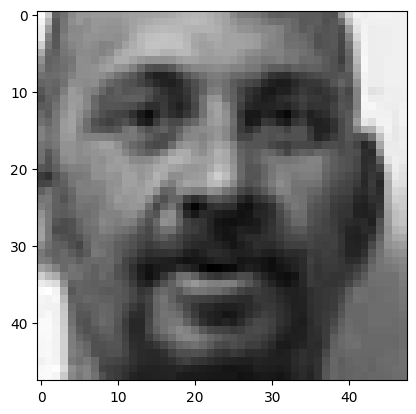

In [10]:
plt.imshow(image, cmap="gray")
plt.show()

**❓ What is the physical characteristic of the image at _index_ `60`?**

- Store in the 3 boolean variables `smile`/`glasses`/`hat` the values `True` if the person smiles/wears glasses/has a hat, `False` else.

In [11]:
data.iloc[55:65]

,age,pixels
55,4,231 177 153 139 133 139 137 135 134 132 136 13...
56,58,208 233 229 220 205 193 193 194 192 190 185 18...
57,40,61 79 109 133 131 132 141 147 150 161 155 152 ...
58,25,163 163 162 163 160 166 117 23 44 29 91 185 21...
59,52,193 197 195 182 132 102 149 164 171 165 164 16...
60,27,24 26 25 36 63 93 98 96 100 101 106 114 122 13...
61,53,68 99 122 163 166 164 158 154 169 163 135 127 ...
62,58,79 81 86 89 82 68 60 53 53 58 70 75 76 76 83 9...
63,20,90 101 134 157 161 162 157 153 154 152 154 154...
64,32,40 52 61 62 52 67 75 99 213 236 236 237 237 24...


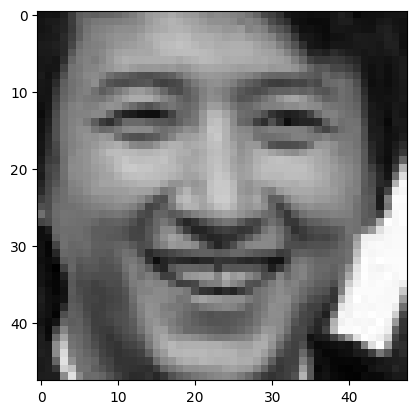

In [12]:
image60 = get_img(data.pixels[60])
plt.imshow(image60, cmap="gray")
plt.show()

In [13]:
# Store your result in the variable below

smile = True
glasses = False
hat = False

### 1.2 Processing

**❓ Your goal is to train a convolutional neural network model to predict the _age_ of a person based solely on a picture of his/her face.**
- Create your **feature matrix** `X` as `ndarray` scaled between 0 and 1
- Create your **target vector** `y` as `ndarray`
- Create your holdout sets: 4 variables (`X_train`, `y_train`) and (`X_test`, `y_test`) keeping the **first** `70%` as the train set
- `X` and `y` shapes should fit a CNN (`model.fit(X,y)`)

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [14]:
y = data.age
y.shape

(23705,)

In [15]:
X = np.stack(data.pixels.map(get_img).values)/255
type(X)

numpy.ndarray

In [16]:
X.shape

(23705, 48, 48, 1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16516)

In [19]:
X_train.shape

(16593, 48, 48, 1)

In [20]:
y_train.shape

(16593,)

### 1.3 Modeling the age of a face

👉 **Only if you haven't managed to create your training sets above**, you can start back from the solution by running the cell below 
- ⚠️ This will download ~500Mo of `.pickle` files on your current working directory
- Then it will load them into 4 ndarrays in memory, and it should delete initial .pickles from your disk

In [22]:
import pickle

def download_solutions():
    file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
    base_url = "https://wagon-public-datasets.s3.amazonaws.com/certification/face_to_age/"
    pickles = dict()

    for file_name in file_names:
        url = f"{base_url + file_name}"
        file_path = f"data/images/{file_name}"
        command = f"curl --output {file_path} {url}"
        ! eval {command}
        with open(file_path, 'rb') as handle:
            pickles[file_name] = pickle.load(handle)
        command = f"rm {file_path}"
        ! eval {command}
        
    return pickles

# UNCOMMENT THIS LINE BELOW TO GET THE CORRECTION IF NEEDED
# X_train, X_test, y_train, y_test = download_solutions().values()

❓ **Before training a complex model, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "naive" case where you always predict mean age
- Store the result under `score_baseline`

In [21]:
mean_age = np.mean(y_train)
mean_age

33.25317905140722

In [22]:
from sklearn.metrics import mean_absolute_error

In [40]:
print(y_test.shape)
print(y_test)

(7112,)
14069    44
4222     38
16935    26
8626     75
1256     25
         ..
7641     26
14335    54
16695    28
6329     25
497      96
Name: age, Length: 7112, dtype: int64


In [24]:
score_baseline = mean_absolute_error(y_test, np.full((7112,), mean_age))
score_baseline

15.291209169275103

❓ **Build and fit a convolutional neural network**

- Name it `model`
- Store output of `.fit()` in a variable `history`
- Do not use transfer learning
- Make sure your model does not overfit with appropriate control techniques

💡 Manage wisely your training time. You should obtain significantly better performance than the baseline in less than 5 minutes with average processor and no graphic cards. 

In [25]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['mae'], label='train mae'  + exp_name)
    ax2.plot(history.history['val_mae'], label='val mae'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('MAE')
    ax2.legend()
    return (ax1, ax2)

In [27]:
model = models.Sequential()
 
model.add(layers.Conv2D(16, kernel_size=8, activation='relu', padding='same', input_shape=(48,48,1)))
model.add(layers.Conv2D(16, kernel_size=4, activation="relu", padding='same'))
model.add(layers.MaxPooling2D(2))
 
model.add(layers.Conv2D(32, kernel_size=4, activation="relu", padding='same',\
                        activity_regularizer=regularizers.L2(0.01)))
model.add(layers.Conv2D(32, kernel_size=4, activation="relu", padding='same',\
                        activity_regularizer=regularizers.L2(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(2))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.005, l2=0.0005)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mse',
          optimizer='adam',
          metrics=['mae'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        1040      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        4112      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        16416     
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                        

In [29]:
es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=200, 
          validation_split=0.3,
          callbacks=[es])

Epoch 1/200


2023-03-22 16:46:34.619911: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


726/726 [==============================] - 19s 26ms/step - loss: 496.1194 - mae: 17.0201 - val_loss: 410.3348 - val_mae: 14.8046
Epoch 2/200
726/726 [==============================] - 20s 27ms/step - loss: 413.1289 - mae: 15.5422 - val_loss: 299.2204 - val_mae: 12.5981
Epoch 3/200
726/726 [==============================] - 20s 28ms/step - loss: 319.1690 - mae: 13.4040 - val_loss: 276.2354 - val_mae: 12.1544
Epoch 4/200
726/726 [==============================] - 20s 28ms/step - loss: 285.7911 - mae: 12.6003 - val_loss: 247.5511 - val_mae: 11.4554
Epoch 5/200
726/726 [==============================] - 21s 28ms/step - loss: 261.2649 - mae: 12.0291 - val_loss: 279.8633 - val_mae: 12.3282
Epoch 6/200
726/726 [==============================] - 21s 29ms/step - loss: 248.3863 - mae: 11.7118 - val_loss: 213.3006 - val_mae: 10.5143
Epoch 7/200
726/726 [==============================] - 21s 30ms/step - loss: 236.9852 - mae: 11.3831 - val_loss: 214.9791 - val_mae: 10.6784
Epoch 8/200
726/726 [====

❓ **Plot your training and validation MAE at each epoch using the cell below**

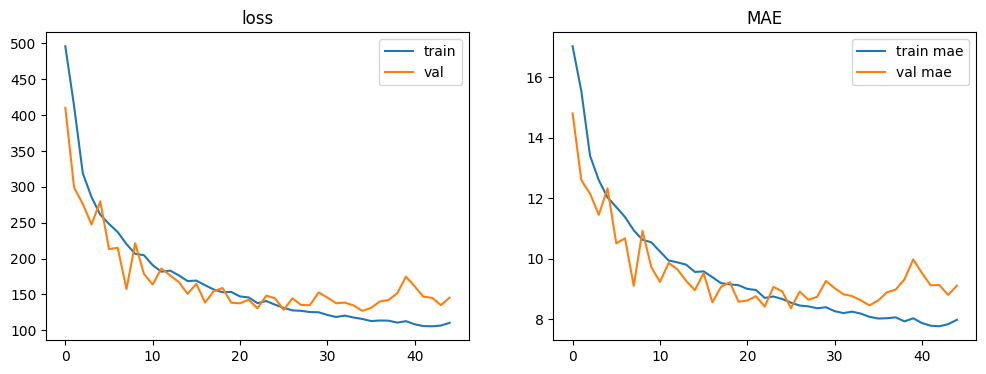

In [30]:
# Plot below your train/val loss history
fig = plot_history(history)


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig.savefig("history_aymeric_cnn.png")

❓ **Evaluate your performances on test set**
- Store your test score as `score_test`

In [31]:
score_test = model.evaluate(X_test, y_test)[1]
score_test

223/223 [==============================] - 2s 10ms/step - loss: 118.9311 - mae: 8.1774


8.177385330200195

In [41]:
y_test = np.array(y_test)

In [42]:
def image_draw(i):
    return plt.imshow(X_test[i]*255)
def image_age(i):
    return y_test[i]
def image_predict(i):
    return model.predict(X_test)[i][0]
def image_test(i):
    image_draw(i)
    print(f'Age réel : {image_age(i)}')
    print(f'Age prédit : {image_predict(i)}')

In [43]:
import random

Age réel : 50
223/223 [==============================] - 2s 9ms/step
Age prédit : 62.72119903564453


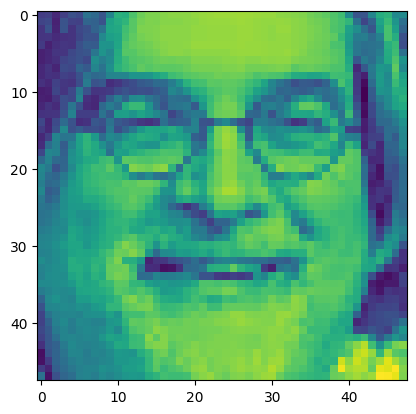

In [46]:
n = random.randint(0, len(y_test))
image_test(n)

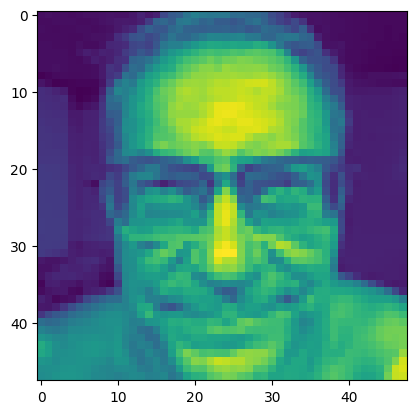

In [49]:
X0 = np.load('photos_normees/Alain59_np.npy')
y0 = 53
plt.imshow(X0)

In [50]:
X1 = X0 / 255
X1 = X1.reshape(1,48,48,1)